<a href="https://colab.research.google.com/github/deeksha-byte/Machine-Learning/blob/main/Linear_Regression_in_one_variable_without_sklearn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [58]:
dataset = pd.read_csv('/content/drive/MyDrive/linear_reg_dataset.txt', delimiter = ',', names = ['col1', 'col2'])
dataset

,col1,col2
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [53]:
##loading the dataset
x_train = dataset.iloc[:, :-1]  # Select all columns except the last one
y_train = dataset.iloc[:, -1]

In [59]:
## checking the dimentions of your variables
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Number of training examples', len(x_train))

Shape of x_train:  (96, 1)
Shape of y_train:  (96, 1)
Number of training examples 96


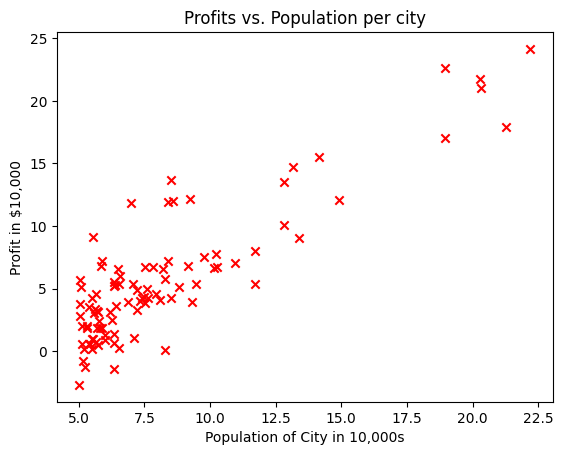

In [60]:
## Create a scatter plot of the data. To change the markers to red "x",
## we used the 'marker' and 'c' parameters (these are just graph visualization parameter use 'b' instead of 'r' and 'o' instaed of 'x')

plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")
plt.show()

In [63]:
def compute_cost(x, y, w, b):

  """
  Compute the cost function for linear regression

  args: 
    x (ndarray): Shape (m,) Input to the model (Population of citites)
    y (ndarray): Shape (m, ) Label (Actual profits for the cities)
    w, b (scalar): Parameters of the model (Q0, Q1)

  Returns
    total_cost(float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y
  """
  ## no of training examples
  m=x.shape[0]

  total_cost=0

  cost_sum=0

  # for i in range(m):
  f_wb = w*x+b  #--h(x)
  cost = (f_wb - y)**2
  total_cost = (1/(2*m)) * np.sum(cost)    # --cost function

  return total_cost

In [38]:
!pip install public_tests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement public_tests (from versions: none)
ERROR: No matching distribution found for public_tests


In [68]:
x_train = np.array(x_train) 
y_train = np.array(y_train)
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
# from public_tests import *
# compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.887


In [40]:
def compute_gradientdes(x, y, w, b):

  """
    Compute the gradient descent for Linear regression

    Args: Same as of cost function

    Returns:
      Q0 (scalar) :The gradient of the cost  w.r.t the parameter w
      Q1 (scalar) :The gradient of the cost  w.r.t the parameter b
  """

  # no. of training examples
  m = x.shape[0]

  Q0=0 
  Q1=0

  for i in range(m):
    f_wb = w*x[i]+b
    Q0_i = (f_wb-y[i]) * x[i]
    Q1_i = (f_wb-y[i])
    Q0 += Q0_i
    Q1 += Q1_i
  
  Q0 = Q0/m
  Q1 = Q1/m

  return Q0, Q1

In [69]:
# Run the cells below to check your implementation of the compute_gradient function with two different initializations of the parameters w, b
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradientdes(x_train, y_train, 0, 0)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

# # Public tests
# from public_tests import *

Gradient at initial w, b (zeros): [-64.88968277] [-5.71670937]


In [70]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

  """
  Performs batch  gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha

  Args:
    x: (ndarray): Shape(m,)
    y: (ndarray): Shape(m,)
    w_in, b_in: (scalar) Initial values of parameters of the model 
    cost_function: function to compute cost
    gradient_function: function to compute the gradient
    alpha: (float) learning rate
    num_iters: (int) number of iterations to run gradient descent
  
  Returns
    w: (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
    b: Updated value of parameter of the model after running gradient descent
  """

  # no. of training examples
  m = len(x)

  # An array to store cost J and w's at each iteration - primarily for graphing later
  J_history = []
  w_history = []

  w = copy.deepcopy(w_in)  # avoid modifying global w within function
  b = b_in

  for i in range(num_iters):
    # Calculate the gradient and update the parameters
    dj_dw, dj_db = gradient_function(x, y, w, b)

    # Update Parameters using w, b, alpha and gradient
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    # Save cost J at each iteration
    if i<100000:
      cost = cost_function(x, y, w, b)
      J_history.append(cost)

    # Print cost every at intervals 10 times or as many iterations if < 10
    if i%math.ceil(num_iters/10) == 0:
      w_history.append(w)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
    
    return w, b, J_history, w_history   # -- return these values for graphing

In [71]:
# Running the gradient descent algo above to learn the parameters for our dataset

# intialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0
initial_b = 0

#some gradient descent settings
iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradientdes, alpha, iterations)
print("w, b found by gradient descent: ", w, b)

Iteration    0: Cost     5.90
w, b found by gradient descent:  [0.64889683] [0.05716709]


In [72]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

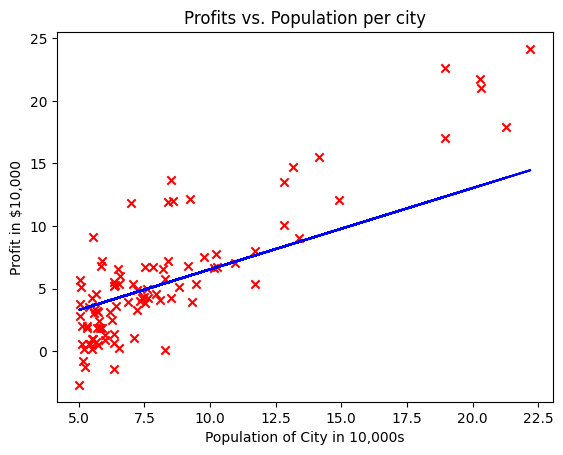

In [73]:
# trained model
plt.plot(x_train, predicted, c="b")  #-- Plot the linear fit

#Create a scatter plot of the data
plt.scatter(x_train, y_train, marker='x', c='r')

#set the title
plt.title("Profits vs. Population per city")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")
plt.show()

In [74]:
# Your final values of 
#  can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

# The model takes in population of a city in 10,000s as input.

# Therefore, 35,000 people can be translated into an input to the model as np.array([3.5])

# Similarly, 70,000 people can be translated into an input to the model as np.array([7.])

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $23283.06
For population = 70,000, we predict a profit of $45994.45
